In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Membuat koneksi ke database SQLite
conn = sqlite3.connect('news_data.db')
c = conn.cursor()

# Label Klasifikasi Manual

In [2]:
# cek jumlah rubrik dan distribusinya

c.execute('select rubrik, count(rubrik) as total from news group by rubrik order by total desc')
temp = c.fetchall()

In [3]:
temp

[('Humaniora', 14188),
 ('Kriminal', 9910),
 ('Pilpres', 9010),
 ('Jatim Terkini', 6280),
 ('Hukum', 5984),
 ('Politik', 5591),
 ('Jabar Terkini', 5452),
 ('Bisnis', 4162),
 ('Olahraga', 3734),
 ('Jateng Terkini', 3661),
 ('Gosip', 3601),
 ('Seleb', 3207),
 ('Sepak Bola', 2654),
 ('Kesehatan', 2531),
 ('Sport', 2494),
 ('Bali Terkini', 2113),
 ('Jogja Terkini', 1953),
 ('Pemilihan Umum', 1900),
 ('Parpol', 1853),
 ('Banten Terkini', 1807),
 ('Bulutangkis', 1555),
 ('Sumut Terkini', 1536),
 ('Musik', 1535),
 ('All Sport', 1480),
 ('Liga Indonesia', 1361),
 ('Lingkungan', 1267),
 ('Industri', 1250),
 ('Papua Terkini', 1239),
 ('Riau', 1215),
 ('Sosial', 1196),
 ('Lampung Terkini', 1147),
 ('Destinasi', 1110),
 ('Mobil', 1072),
 ('Sumsel', 977),
 ('Pendidikan', 951),
 ('Daerah', 949),
 ('Makro', 924),
 ('UMKM', 830),
 ('Moto GP', 809),
 ('Nasional', 776),
 ('Food', 748),
 ('Investasi', 718),
 ('Tokoh', 694),
 ('Film', 647),
 ('Asia Oceania', 618),
 ('ABC Indonesia', 606),
 ('Kaltim Terkin

In [4]:
try:
    c.execute('ALTER TABLE news ADD COLUMN kategori VARCHAR(50);')
except Exception as e:
    print(e)

duplicate column name: kategori


In [5]:
# kueri = '''
# UPDATE news SET kategori = 
#   CASE
#     WHEN rubrik IN ('Humaniora', 'Jatim Terkini', 'Jabar Terkini', 'Jateng Terkini', 'Bali Terkini', 'Jogja Terkini', 'Banten Terkini', 'Sumut Terkini', 'Papua Terkini', 'Riau', 'Lampung Terkini', 'Sumsel', 'Daerah', 'Nasional', 'Sumbar Terkini', 'Sulsel', 'Aceh', 'NTB Terkini', 'Kalbar', 'Kalsel Terkini', 'Bengkulu', 'Maluku', 'NTT', 'Jambi', 'Kalteng', 'Gorontalo', 'Sulteng', 'Kep. Bangka Belitung', 'Kalsel', 'Sulut', 'Kaltara', 'Maluku Utara', 'Jakarta Terkini', 'Sulbar', 'Sultra Terkini') THEN 'Berita Umum dan Regional'
#     WHEN rubrik IN ('Pilpres', 'Hukum', 'Politik', 'Pemilihan Umum', 'Parpol', 'Legislatif', 'Pilkada', 'KPU', 'Bawaslu', 'Istana') THEN 'Politik dan Pemerintahan'
#     WHEN rubrik IN ('Bisnis', 'Investasi', 'Industri', 'Makro', 'UMKM', 'Pasar', 'Properti', 'Ekonomi', 'Syariah') THEN 'Bisnis dan Ekonomi'
#     WHEN rubrik IN ('Olahraga', 'Sport', 'Sepak Bola', 'Bulutangkis', 'All Sport', 'Liga Indonesia', 'Moto GP', 'Basket', 'Motor', 'Liga Inggris', 'Formula 1', 'Tenis', 'Liga Spanyol', 'Liga Italia', 'Liga Jerman') THEN 'Olahraga'
#     WHEN rubrik IN ('Kesehatan', 'Sosial', 'Perempuan', 'Keluarga') THEN 'Kesehatan dan Sosial'
#     WHEN rubrik IN ('Gosip', 'Seleb', 'Musik', 'Film', 'Hobi', 'Lifestyle', 'Entertainment') THEN 'Hiburan dan Gaya Hidup'
#     WHEN rubrik IN ('Smart Techno', 'Gadget', 'Internet', 'Komputer', 'Modifikasi', 'Otomotif', 'Sains') THEN 'Teknologi dan Sains'
#     WHEN rubrik IN ('Pendidikan', 'Artikel') THEN 'Pendidikan dan Literasi'
#     WHEN rubrik IN ('Lingkungan', 'Destinasi', 'Travel', 'Piknik') THEN 'Lingkungan dan Pariwisata'
#     WHEN rubrik IN ('Bitcoin', 'Crypto', 'Blockchain', 'Exchange') THEN 'Ekonomi Kripto'
#     WHEN rubrik IN ('Asia Oceania', 'Timur Tengah', 'Eropa', 'Global', 'Amerika', 'Afrika', 'Internasional') THEN 'Berita Internasional'
#     WHEN rubrik = 'Kriminal' THEN 'Kriminal'
#     WHEN rubrik IN ('Food', 'Mobil', 'Event', 'Tokoh', 'Produk', 'Opini', 'Komunikasi', 'Komunitas', 'Asmara', 'Militeriana', 'Cak Abror', 'Seputar Mudik', 'Berita Ramadan', 'Akomodasi', 'Hikmah Ramadan', 'Komersial', 'Tips', 'Amalan Ramadan', 'Features', 'Tips Ramadan', 'Siaran Pers', 'Advetorial') THEN 'Lain-lain'
#     ELSE 'Lain-lain'
#   END;
# '''
kueri = '''
UPDATE news SET kategori = 
  CASE
    WHEN rubrik IN ('Pilpres', 'Hukum', 'Politik', 'Pemilihan Umum', 'Parpol', 'Legislatif', 'Pilkada', 'KPU', 'Bawaslu', 'Istana', 'Militeriana') THEN 'Politik dan Pemerintahan'
    WHEN rubrik IN ('Bisnis', 'Investasi', 'Industri', 'Makro', 'UMKM', 'Pasar', 'Properti', 'Ekonomi', 'Syariah', 'Bitcoin', 'Crypto', 'Blockchain', 'Exchange', 'Produk') THEN 'Bisnis dan Ekonomi'
    WHEN rubrik IN ('Olahraga', 'Sport', 'Sepak Bola', 'Bulutangkis', 'All Sport', 'Liga Indonesia', 'Moto GP', 'Basket', 'Motor', 'Liga Inggris', 'Formula 1', 'Tenis', 'Liga Spanyol', 'Liga Italia', 'Liga Jerman') THEN 'Olahraga'
    WHEN rubrik IN ('Kesehatan', 'Sosial', 'Perempuan', 'Keluarga', 'Lingkungan', 'Destinasi', 'Travel', 'Piknik', 'Pendidikan', 'Food', 'Komunikasi', 'Komunitas', 'Seputar Mudik') THEN 'Kesehatan dan Sosial'
    WHEN rubrik IN ('Gosip', 'Seleb', 'Musik', 'Film', 'Hobi', 'Lifestyle', 'Entertainment', 'Event', 'Smart Techno', 'Gadget', 'Internet', 'Komputer', 'Modifikasi', 'Otomotif','Sains', 'Mobil') THEN 'Hiburan dan Gaya Hidup'
    WHEN rubrik = 'Kriminal' THEN 'Kriminal'
  END
'''
c.execute(kueri)

In [10]:
c.execute('select kategori, count(kategori) as total from news where kategori is not null group by kategori order by total desc')
temp = c.fetchall()

In [11]:
dftemp = pd.DataFrame(temp, columns=['kategori', 'total'])

In [12]:
dftemp

,kategori,total
0,Politik dan Pemerintahan,25475
1,Olahraga,15409
2,Hiburan dan Gaya Hidup,11597
3,Kriminal,9910
4,Bisnis dan Ekonomi,9236
5,Kesehatan dan Sosial,8769


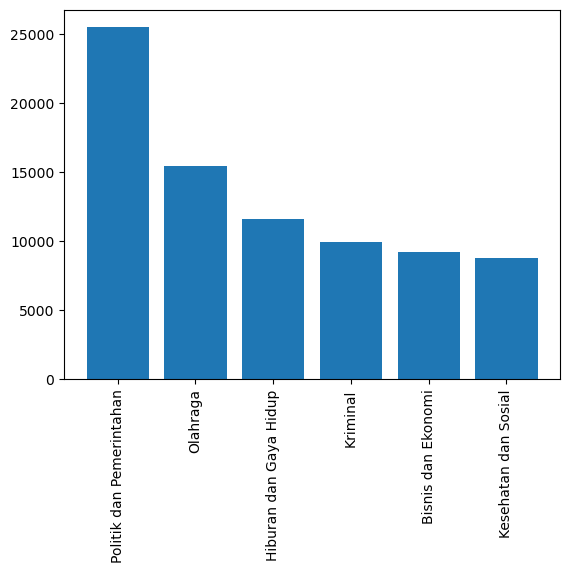

In [13]:
plt.bar(dftemp.kategori, dftemp.total)
plt.xticks(rotation='vertical')
plt.show()

In [14]:
temp

[('Politik dan Pemerintahan', 25475),
 ('Olahraga', 15409),
 ('Hiburan dan Gaya Hidup', 11597),
 ('Kriminal', 9910),
 ('Bisnis dan Ekonomi', 9236),
 ('Kesehatan dan Sosial', 8769)]

# Cleaning teks

In [31]:
sql = "select x.content, y.kategori from extracted_text x inner join news y on x.url=y.url where y.kategori is not null"
df = pd.read_sql(sql, con=conn)

In [32]:
df

,content,kategori
0,"jpnn.com , JAKARTA - Pendukung dan pemilih pas...",Politik dan Pemerintahan
1,jpnn.com - Tim voli Jakarta Pertamina siap me...,Olahraga
2,"jpnn.com , JAKARTA - Pakar ekonomi Bhima Yudhi...",Bisnis dan Ekonomi
3,"jpnn.com , JAKARTA - Produk-produk Soundcore ...",Hiburan dan Gaya Hidup
4,"jateng.jpnn.com , JAKARTA - Persija Jakarta ...",Olahraga
...,...,...
71026,"jpnn.com , JAKARTA - Harga emas di Pegadaian...",Bisnis dan Ekonomi
71027,"jpnn.com , JAKARTA - Sektor pariwisata yang ...",Bisnis dan Ekonomi
71028,"jogja.jpnn.com , YOGYAKARTA - Perguruan tinggi...",Politik dan Pemerintahan
71029,"jpnn.com , DELI SERDANG - Penganiayaan diala...",Kriminal


In [33]:
df['content'] = ["-".join(x.split("-")[1:]) for x in df['content']]
df['content'] = df['content'].str.replace(r'[^\w.,\s]', '', regex=True)
df['content'] = df['content'].str.replace(r'\b\w*jpnn\w*\b', ' ', regex=True)
df['content'] = df['content'].str.replace(r' , ', ' ', regex=True)
df['content'] = df['content'].str.replace(r'\s+', ' ', regex=True)
df['content'] = df['content'].str.replace(r'([^\w\s])', r' \1', regex=True)
df['content'] = df['content'].str.strip()
df['content'] = df['content'].str.lower()

In [34]:
df.iloc[0,0]

'pendukung dan pemilih pasangan prabowogibran akan menggelar aksi massa damai menjelang putusan mahkamah konstitusi mk . tkn prabowogibran haris rusly moti mengeklaim sebanyak 100 ribu orang akan hadir pada aksi damai tersebut . ia mengatakan aksi damai tersebut akan digelar pada jumat 194 depan . kami mendengar informasi terkait adanya aksi massa damai yang diperkirakan dihadiri kurang lebih 100 ribu orang pendukung dan pemilih pasangan prabowogibran yang dipusatkan di depan kantor mahkamah konstitusi , kata haris dalam konferensi pers di rumah besar relawan prabowogibran , jakarta barat , rabu 174 malam . aksi damai pendukung dan pemilih pasangan prabowogibran tersebut akan digelar pada hari jumat tanggal 19 april 2024 , imbuhnya . aksi damai tersebut , katanya , digelar untuk merespons berbagai tuduhan , penghinaan dan pelecehan kepada pemilih pasangan prabowogibran . seakanakan 96 ,2 juta orang melaksanakan hak pilihnya untuk memilih pasangan prabowogibran karena disuap dengan bant

In [35]:
df.loc[0]

content     pendukung dan pemilih pasangan prabowogibran a...
kategori                             Politik dan Pemerintahan
Name: 0, dtype: object

In [36]:
import pickle
with open("news_data.pickle", "wb") as file:
    pickle.dump(df, file)

# Klasifikasi Berita

In [37]:
# Langkah 2: Membersihkan dan mempersiapkan data
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [38]:
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [39]:
# Jika belum terdownload, jalankan perintah berikut:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\apria.PLAINWHITE\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\apria.PLAINWHITE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
# Stopwords untuk Bahasa Indonesia
stopwords_indonesia = set(stopwords.words('indonesian'))

In [41]:
def preprocess_text(text):
    # Tokenisasi
    tokens = word_tokenize(text.lower())
    # Menghilangkan tanda baca dan kata umum (stopwords)
    tokens = [word for word in tokens if word not in string.punctuation]
    tokens = [word for word in tokens if word not in stopwords_indonesia]
    return ' '.join(tokens)

df['cleaned_text'] = df['content'].apply(preprocess_text)

In [42]:
# Langkah 3: Mengubah teks menjadi fitur numerik
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['cleaned_text'])

In [43]:
df['kategori'].unique()

array(['Politik dan Pemerintahan', 'Olahraga', 'Bisnis dan Ekonomi',
       'Hiburan dan Gaya Hidup', 'Kriminal', 'Kesehatan dan Sosial'],
      dtype=object)

In [44]:
# Langkah 4: Melatih model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, df['kategori'], test_size=0.3, random_state=42, stratify=df['kategori'])

# Membuat model klasifikasi Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [45]:
# Langkah 5: Mengevaluasi model
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.8503050211168466

Laporan Klasifikasi:
                           precision    recall  f1-score   support

      Bisnis dan Ekonomi       0.81      0.74      0.78      2479
  Hiburan dan Gaya Hidup       0.96      0.83      0.89      3025
    Kesehatan dan Sosial       0.95      0.47      0.63      2281
                Kriminal       0.92      0.82      0.87      2473
                Olahraga       0.99      0.94      0.96      3990
Politik dan Pemerintahan       0.75      0.98      0.85      7062

                accuracy                           0.85     21310
               macro avg       0.89      0.80      0.83     21310
            weighted avg       0.87      0.85      0.85     21310



In [46]:
# Contoh prediksi
new_texts = ['Saya sedang mengembangkan aplikasi Android menggunakan Java', 'Python luar biasa untuk analisis data']
new_texts_cleaned = [preprocess_text(text) for text in new_texts]
new_X = vectorizer.transform(new_texts_cleaned)
predictions = model.predict(new_X)
print("\nPrediksi untuk teks baru:", predictions)


Prediksi untuk teks baru: ['Hiburan dan Gaya Hidup' 'Politik dan Pemerintahan']
